# Top
http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html

## Relevant functions
Modules
- [cross_validation](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.cross_validation)
  - [`KFold(n, n_folds=3, indices=None, shuffle=False, random_state=None)[source]`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html)
  - [`StratifiedKFold(y, n_folds=3, indices=None, shuffle=False, random_state=None)`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedKFold.html)
- [grid_search](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.grid_search)
    - [`grid_search.GridSearchCV(estimator, param_grid)`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html)

In [1]:
from sklearn import datasets, svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.97999999999999998

# Cross validation (for obtaining performance measure)

## Approach1: np.array_split

In [2]:
X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)
scores = list()
for k in range(3):
    # We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test  = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test  = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
print "Scores in each fold (3-CV): ", scores

Scores in each fold (3-CV):  [0.93489148580968284, 0.95659432387312182, 0.93989983305509184]


## Approach2: use cv generators

In [3]:
from sklearn import cross_validation
k_fold = cross_validation.KFold(n=6, n_folds=3)
for train_indices, test_indices in k_fold:
     print('Train: %s | test: %s' % (train_indices, test_indices))

# implement CV here
kfold = cross_validation.KFold(len(X_digits), n_folds=3)

# wonky but list comprehension is possible (as cv instance is iterable)
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test])
         for train, test in kfold]
print "Scores in each fold (3-CV): ", scores

Train: [2 3 4 5] | test: [0 1]
Train: [0 1 4 5] | test: [2 3]
Train: [0 1 2 3] | test: [4 5]
Scores in each fold (3-CV):  [0.93489148580968284, 0.95659432387312182, 0.93989983305509184]


# Grid-search and cv
http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html

array([-13.81551056, -12.53629662, -11.25708268,  -9.97786874,
        -8.6986548 ,  -7.41944086,  -6.14022691,  -4.86101297,
        -3.58179903,  -2.30258509])

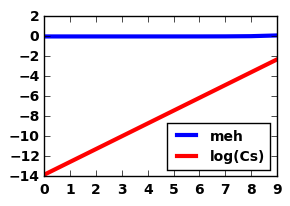

In [4]:
from sklearn.grid_search import GridSearchCV
Cs = np.logspace(-6, -1,10)
plt.figure(figsize=(3,2))
plt.plot(Cs, label='meh' )
plt.plot(np.log(Cs), 'r', label='log(Cs)')
plt.legend(loc='best')
np.log(Cs) 

**Notes**
 - gridsearch instantation accepts estimator, dict of gridsearch

In [5]:
# create an instance of GridSearch object
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),n_jobs=-1)
Xtr,Xts=X_digits[:1000],X_digits[1000:]
ytr,yts=y_digits[:1000],y_digits[1000:]

# tune (notice "fit" method can be applied)
clf.fit(Xtr,ytr)        

print clf.best_score_                                  
print clf.best_estimator_.C                            

# Prediction performance on test set is not as good as on train set
clf.score(Xts,yts)      

0.925
0.00774263682681


0.94353826850690092

## Explore what's inside GridSearCV instance

Some notes about pandas:
- df has no `str` method
- Series has no `query` method

In [41]:
# some notes about pandas:
# - df has no "str" method
# - Series has no "query" method

# pd.set_option('display.max_rows', 5)
# pd.set_option('precision',3)
# pd.DataFrame(dir(clf)).ix[25:].str.upper

tmp = pd.Series(dir(clf))[25:] # <- Use Series since DF has no "str" method
df = pd.DataFrame(tmp[tmp.str.endswith('_')]) # <- convert to DataFrame for display purpose
df
# tmp.quantile
# tmp.str.endswith('_') # <- "str" in pandas only available for Series (me thinks...)

# tmp[tmp[0].str.('_')]
# tmp.

,0
25,best_estimator_
26,best_params_
27,best_score_
35,grid_scores_
46,scorer_


In [65]:
for k in df.values:
    # print attributes ending with underscore
#     print k[0]
    print "\nclf.{} = {}".format(k[0], getattr(clf,k[0]))

# print "\nclf.best_estimator_ = ",clf.best_estimator_
# print "\nclf.best_params_",clf.best_params_
# print "\nclf.best_score_",clf.best_score_
# print "\nclf.scorer_",clf.scorer_
clf.grid_scores_


clf.best_estimator_ = SVC(C=0.0077426368268112772, cache_size=200, class_weight=None, coef0=0.0,
  degree=3, gamma=0.0, kernel='linear', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

clf.best_params_ = {'C': 0.0077426368268112772}

clf.best_score_ = 0.925

clf.grid_scores_ = [mean: 0.10400, std: 0.00073, params: {'C': 9.9999999999999995e-07}, mean: 0.10400, std: 0.00073, params: {'C': 3.5938136638046257e-06}, mean: 0.50600, std: 0.00489, params: {'C': 1.2915496650148827e-05}, mean: 0.84600, std: 0.00739, params: {'C': 4.6415888336127818e-05}, mean: 0.90500, std: 0.01511, params: {'C': 0.00016681005372000591}, mean: 0.92000, std: 0.01047, params: {'C': 0.00059948425031894088}, mean: 0.92100, std: 0.02001, params: {'C': 0.0021544346900318843}, mean: 0.92500, std: 0.01871, params: {'C': 0.0077426368268112772}, mean: 0.92400, std: 0.01729, params: {'C': 0.02782559402207126}, mean: 0.92400, std: 0.01729, params: {'C': 0.10000000000000001}]


[mean: 0.10400, std: 0.00073, params: {'C': 9.9999999999999995e-07},
 mean: 0.10400, std: 0.00073, params: {'C': 3.5938136638046257e-06},
 mean: 0.50600, std: 0.00489, params: {'C': 1.2915496650148827e-05},
 mean: 0.84600, std: 0.00739, params: {'C': 4.6415888336127818e-05},
 mean: 0.90500, std: 0.01511, params: {'C': 0.00016681005372000591},
 mean: 0.92000, std: 0.01047, params: {'C': 0.00059948425031894088},
 mean: 0.92100, std: 0.02001, params: {'C': 0.0021544346900318843},
 mean: 0.92500, std: 0.01871, params: {'C': 0.0077426368268112772},
 mean: 0.92400, std: 0.01729, params: {'C': 0.02782559402207126},
 mean: 0.92400, std: 0.01729, params: {'C': 0.10000000000000001}]

In [73]:
df = pd.DataFrame(clf.grid_scores_,columns=['C','mean','std'])

# from IPython.display import HTML
# h = HTML(df.to_html());

,C,mean,std
0,{u'C': 1e-06},0.104,"[0.104166666667, 0.104790419162, 0.10303030303]"
1,{u'C': 3.5938136638e-06},0.104,"[0.104166666667, 0.104790419162, 0.10303030303]"
2,{u'C': 1.29154966501e-05},0.506,"[0.5, 0.511976047904, 0.506060606061]"
3,{u'C': 4.64158883361e-05},0.846,"[0.839285714286, 0.85628742515, 0.842424242424]"
4,{u'C': 0.00016681005372},0.905,"[0.883928571429, 0.913173652695, 0.918181818182]"
5,{u'C': 0.000599484250319},0.920,"[0.907738095238, 0.919161676647, 0.933333333333]"
6,{u'C': 0.00215443469003},0.921,"[0.91369047619, 0.90119760479, 0.948484848485]"
7,{u'C': 0.00774263682681},0.925,"[0.91369047619, 0.910179640719, 0.951515151515]"
8,{u'C': 0.0278255940221},0.924,"[0.91369047619, 0.910179640719, 0.948484848485]"
9,{u'C': 0.1},0.924,"[0.91369047619, 0.910179640719, 0.948484848485]"


In [69]:
# fuck...this probably is better
clf.__dict__

{'best_estimator_': SVC(C=0.0077426368268112772, cache_size=200, class_weight=None, coef0=0.0,
   degree=3, gamma=0.0, kernel='linear', max_iter=-1, probability=False,
   random_state=None, shrinking=True, tol=0.001, verbose=False),
 'best_params_': {'C': 0.0077426368268112772},
 'best_score_': 0.92500000000000004,
 'cv': None,
 'error_score': 'raise',
 'estimator': SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
   kernel='linear', max_iter=-1, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False),
 'fit_params': {},
 'grid_scores_': [mean: 0.10400, std: 0.00073, params: {'C': 9.9999999999999995e-07},
  mean: 0.10400, std: 0.00073, params: {'C': 3.5938136638046257e-06},
  mean: 0.50600, std: 0.00489, params: {'C': 1.2915496650148827e-05},
  mean: 0.84600, std: 0.00739, params: {'C': 4.6415888336127818e-05},
  mean: 0.90500, std: 0.01511, params: {'C': 0.00016681005372000591},
  mean: 0.92000, std: 0.01047, params: {'C': 0.000599

## Weird....GridSearchCV doesn't seem to return CV-indices....

# Bunch of examples

## RFE with CV (GridSearch class not used)
- ([link](http://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#example-feature-selection-plot-rfe-with-cross-validation-py))

Optimal number of features : 3


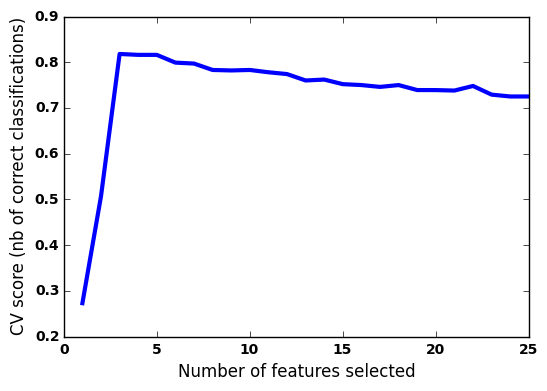

In [8]:
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

svc = SVC(kernel="linear")

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y, 2),scoring='accuracy') 
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("CV score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [9]:
dir(rfecv)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_get_param_names',
 '_get_support_mask',
 'cv',
 'decision_function',
 'estimator',
 'estimator_',
 'estimator_params',
 'fit',
 'fit_transform',
 'get_params',
 'get_support',
 'grid_scores_',
 'inverse_transform',
 'n_features_',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'ranking_',
 'score',
 'scoring',
 'set_params',
 'step',
 'support_',
 'transform',
 'verbose']